In [6]:
import pennylane as qml
import torch

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# forma típica dos pesos:
# BasicEntangler: (n_layers, n_qubits)
# StronglyEntangling: (n_layers, n_qubits, 3)
n_layers = 2

obs_list = [qml.PauliZ(i) for i in range(n_qubits)]

def make_circuit(entangler_type):
    @qml.qnode(dev, interface="torch")
    def circuit(inputs, weights):
        qml.AngleEmbedding(inputs, wires=range(n_qubits))
        if entangler_type == "basic":
            qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
        elif entangler_type == "strong":
            qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
        return [qml.expval(obs) for obs in obs_list]
    return circuit

circuit_basic = make_circuit("basic")
circuit_strong = make_circuit("strong")

# dados de exemplo
x = torch.rand(n_qubits)

w_basic = torch.rand((n_layers, n_qubits))
w_strong = torch.rand((n_layers, n_qubits, 3))

# desenhar em ASCII
print("=== BASIC ===")
print(qml.draw(circuit_basic)(x, w_basic))

print("\n=== STRONG ===")
print(qml.draw(circuit_strong)(x, w_strong))


=== BASIC ===
0: ─╭AngleEmbedding(M0)─╭BasicEntanglerLayers(M1)─┤  <Z>
1: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
2: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
3: ─╰AngleEmbedding(M0)─╰BasicEntanglerLayers(M1)─┤  <Z>

M0 = 
tensor([0.5161, 0.5608, 0.8971, 0.3060])
M1 = 
tensor([[0.2975, 0.1344, 0.0369, 0.9688],
        [0.8285, 0.2966, 0.7814, 0.6143]])

=== STRONG ===
0: ─╭AngleEmbedding(M0)─╭StronglyEntanglingLayers(M1)─┤  <Z>
1: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <Z>
2: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <Z>
3: ─╰AngleEmbedding(M0)─╰StronglyEntanglingLayers(M1)─┤  <Z>

M0 = 
tensor([0.5161, 0.5608, 0.8971, 0.3060])
M1 = 
tensor([[[0.9911, 0.2551, 0.7307],
         [0.3537, 0.5634, 0.2825],
         [0.5520, 0.1405, 0.5525],
         [0.4666, 0.9114, 0.2621]],

        [[0.2806, 0.0474, 0.2045],
         [0.1679, 0.6424, 0.0751],
         [0.7204, 0.2120, 0.5097],
         [0.1069, 0.2347, 0.5918]]])


In [7]:
import numpy as np
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def circuit(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(4))
    #qml.Barrier(wires=range(n_qubits))
    return qml.expval(qml.Z(0))

shape = qml.StronglyEntanglingLayers.shape(n_layers=10, n_wires=4)
rng = np.random.default_rng(12345)
weights = rng.random(size=shape)

In [8]:
print(qml.draw(circuit, level="device")(weights))

0: ──Rot(0.23,0.32,0.80)─╭●───────╭X──Rot(0.67,0.10,0.44)─╭●────╭X──Rot(0.27,0.82,0.19) ···
1: ──Rot(0.68,0.39,0.33)─╰X─╭●────│───Rot(0.89,0.70,0.33)─│──╭●─│──╭X────────────────── ···
2: ──Rot(0.60,0.19,0.67)────╰X─╭●─│───Rot(0.73,0.22,0.08)─╰X─│──╰●─│─────────────────── ···
3: ──Rot(0.94,0.25,0.95)───────╰X─╰●──Rot(0.16,0.34,0.47)────╰X────╰●────────────────── ···

0: ··· ──────────────────────╭●─╭X──Rot(0.55,0.94,0.49)───────────────────── ···
1: ··· ──Rot(0.13,0.09,0.60)─│──╰●─╭X────────────────────Rot(0.27,0.45,0.67) ···
2: ··· ──Rot(0.85,0.60,0.93)─│─────╰●───────────────────╭X────────────────── ···
3: ··· ──Rot(0.72,0.86,0.93)─╰X─────────────────────────╰●────────────────── ···

0: ··· ─╭●─────────────────────────╭X──Rot(0.01,0.63,0.28)─╭●────╭X──Rot(0.26,0.30,0.28) ···
1: ··· ─╰X───────────────────╭●────│───Rot(0.07,0.62,0.18)─│──╭●─│──╭X────────────────── ···
2: ··· ──Rot(0.33,0.90,0.26)─╰X─╭●─│───Rot(0.30,0.44,0.15)─╰X─│──╰●─│─────────────────── ···
3: ··· ──Rot(0.34,0.26,0.36

(<Figure size 5000x500 with 1 Axes>, <Axes: >)

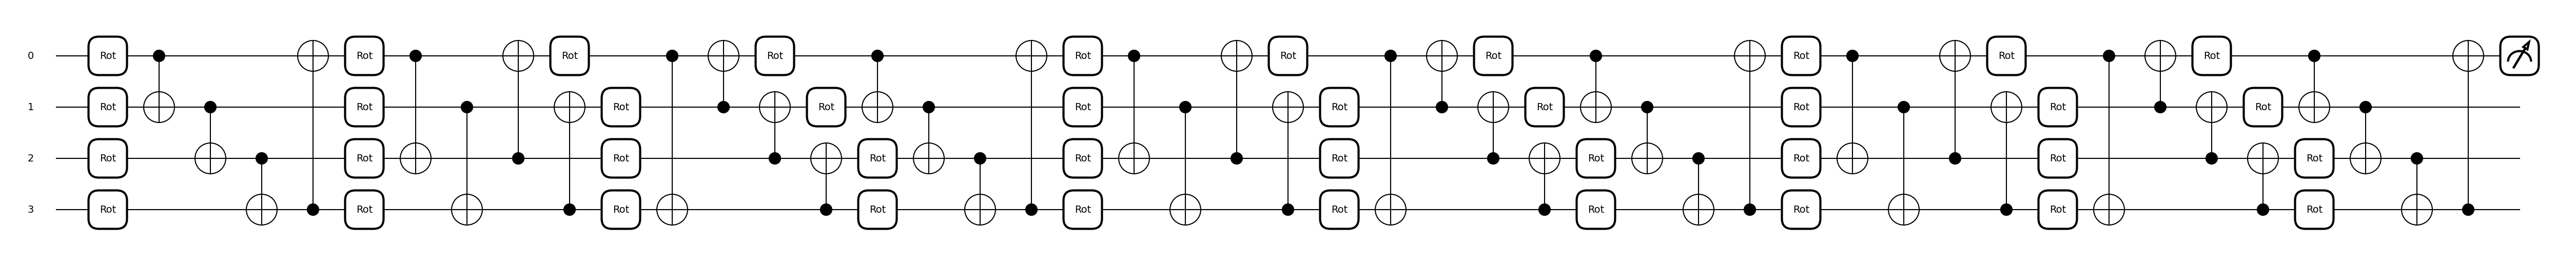

In [9]:
qml.draw_mpl(circuit, level='device')(weights)
